In [1]:

from substructure_classifier.substructure_classifier_development import SubstructureClassifier
import json
example_config=SubstructureClassifier.get_example_classifier_config().copy()
print(json.dumps(example_config, indent=4))

example_config["classifier_name"]="third_transformer"

example_config["active_val_cats_live"]=[
#     ["SIS_10e10_sub_test", "AlmaSinglePsfDataset", {
#         #"catalog_name, 
#         #samples_used="all", 
#         #image_data_type=torch.float32,
#         "psf_name":"devon_first_advice_psf_3_pix_16_arcsec",
#         "noise_std":0.0, 
#     }
    
#     ]
]
#get one image to establish the transformer images size:
from deep_learning import AlmaSinglePsfDataset
initialization_config= {
        #"catalog_name, 
        #samples_used="all", 
        #image_data_type=torch.float32,
        "psf_name":"devon_first_advice_psf_3_pix_16_arcsec",
        "noise_std":0.0, 
    }
initialization_config["catalog_name"]="SIS_10e10_sub_test"

dataset=AlmaSinglePsfDataset(**initialization_config)
image_pixel_size=dataset.get_image_pixel_size()
print(f"image pixel size: {image_pixel_size}")

example_config["NN_model"]="VisionTransformer"

example_config["NN_config"]={
        "img_size": image_pixel_size,
        "patch_size":32,
        "in_channels":1,
        "num_classes":2,
        "embed_dim":384,
        "depth":8,
        "num_heads":8,
        "mlp_ratio":4.0,
        "qkv_bias":True,
        "drop_rate":0.0,  # No dropout for evaluation
}

my_classifier = SubstructureClassifier("third_transformer", config_dict=example_config)

{
    "classifier_name": "test_classifier2",
    "NN_model": "ResNet50",
    "NN_config": {},
    "active_val_cats_live": [
        [
            "SIS_10e9_sub_test",
            "NoNoiseDataset",
            {
                "grid_width_arcsec": 6.0,
                "grid_pixel_side": 100
            }
        ],
        [
            "SIS_10e8_sub_test",
            "NoNoiseDataset",
            {
                "grid_width_arcsec": 6.0,
                "grid_pixel_side": 100
            }
        ]
    ]
}
Using device in AlmaSinglePsfDataset: cuda
PSF side pixels: 2292
Original PSF shape: torch.Size([1, 1, 2292, 2292])
alert: FOV is hardcoded to 8.0 arcseconds. To hide this, set alert=False
Created grid with size 1146x1146 (half of PSF)
Dataset initialized with noise_std=0.0, threshold=None
image pixel size: 1146


In [2]:
from substructure_classifier.training_stage_development import Stage
example_config=Stage.get_example_config(return_config=True)
from substructure_classifier.substructure_classifier_development import SubstructureClassifier

my_classifier=SubstructureClassifier("third_transformer")

example_config["training_catalog"]="big_conor_similar_training_cat"
example_config["validation_like_train_catalog"]="big_conor_similar_training_cat_val"
example_config["dataset_class_str"]="AlmaSinglePsfDataset"
example_config["dataset_config"]={
    "psf_name":"devon_first_advice_psf_3_pix_16_arcsec",
    "noise_std":0.0, 
}

example_config["samples_used_for_training"]=4000
example_config["samples_used_for_validation"]=4000
example_config["batch_size"]=10
example_config["jump_batch_val"]=200
example_config["learning_rate"]=0.0002
example_config["epochs"]=1
my_stage=Stage(classifier_instance=my_classifier, config=example_config, device="cuda")

my_stage.train(train_ready=True, early_stopping=True)

example_config=Stage.get_example_config(return_config=True)

example_config["training_catalog"]="SIS_10e10_sub_train"
example_config["validation_like_train_catalog"]="SIS_10e10_sub_val_extended"
example_config["dataset_class_str"]="AlmaSinglePsfDataset"
example_config["dataset_config"]={
    "psf_name":"devon_first_advice_psf_3_pix_16_arcsec",
    "noise_std":0.0, 
}

example_config["samples_used_for_training"]=4000
example_config["samples_used_for_validation"]=4000
example_config["batch_size"]=10
example_config["jump_batch_val"]=200
example_config["learning_rate"]=0.0002
example_config["epochs"]=1
my_stage=Stage(classifier_instance=my_classifier, config=example_config, device="cuda")

my_stage.train(train_ready=True, early_stopping=True)
example_config=Stage.get_example_config(return_config=True)

example_config["training_catalog"]="big_conor_similar_training_cat"
example_config["validation_like_train_catalog"]="big_conor_similar_training_cat_val"
example_config["dataset_class_str"]="AlmaSinglePsfDataset"
example_config["dataset_config"]={
    "psf_name":"devon_first_advice_psf_3_pix_16_arcsec",
    "noise_std":0.0, 
}

example_config["samples_used_for_training"]=4000
example_config["samples_used_for_validation"]=4000
example_config["batch_size"]=10
example_config["jump_batch_val"]=200
example_config["learning_rate"]=0.0002
example_config["epochs"]=1
my_stage=Stage(classifier_instance=my_classifier, config=example_config, device="cuda")
my_stage.train(train_ready=True, early_stopping=True)

forcing only one entry per catalog in add activ val cat live, substructure classifier dev
should have updated the classifier config file
forcing only one entry per catalog in add activ val cat live, substructure classifier dev
should have updated the classifier config file
Implement the device compatibility check in _check_ready_to_train, util.py
Using device in AlmaSinglePsfDataset: cuda
PSF side pixels: 2292
Original PSF shape: torch.Size([1, 1, 2292, 2292])
alert: FOV is hardcoded to 8.0 arcseconds. To hide this, set alert=False
Created grid with size 1146x1146 (half of PSF)
Dataset initialized with noise_std=0.0, threshold=None
Model initialized with default random parameters
Using device in AlmaSinglePsfDataset: cuda
PSF side pixels: 2292
Original PSF shape: torch.Size([1, 1, 2292, 2292])
alert: FOV is hardcoded to 8.0 arcseconds. To hide this, set alert=False
Created grid with size 1146x1146 (half of PSF)
Dataset initialized with noise_std=0.0, threshold=None
Using device in Alma

Epoch 1/1:   0%|          | 0/400 [00:00<?, ?batch/s]

KeyboardInterrupt: 

Right now considering only selection by catalog and not by dataset in plotting in substructure_classifier_development.py
running loss plot for the training catalogs


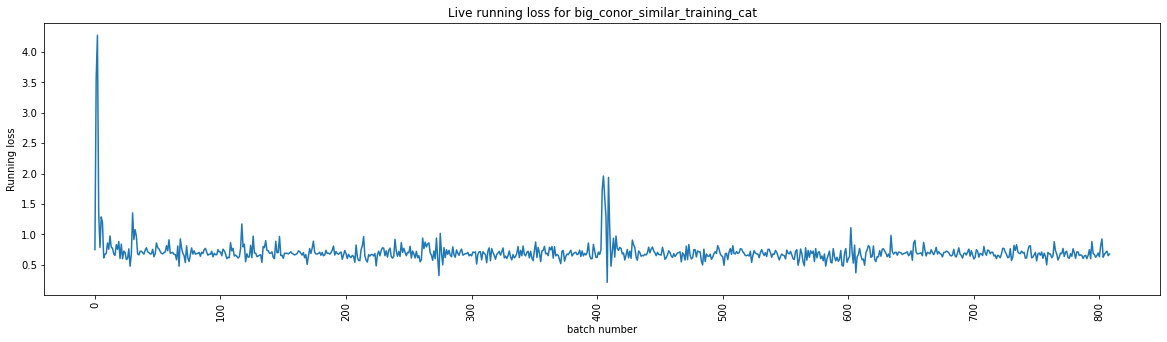

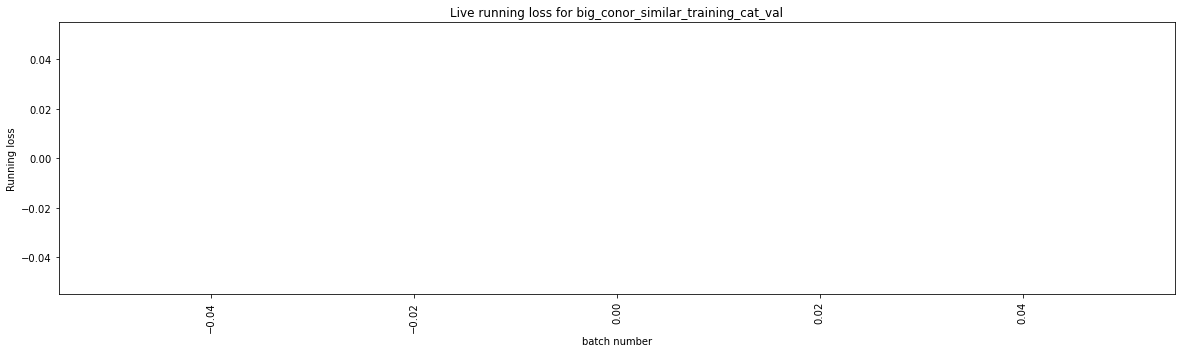

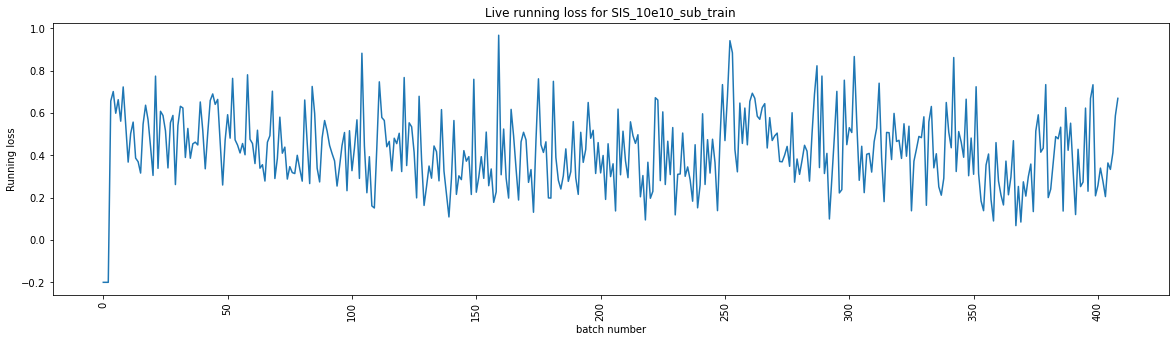

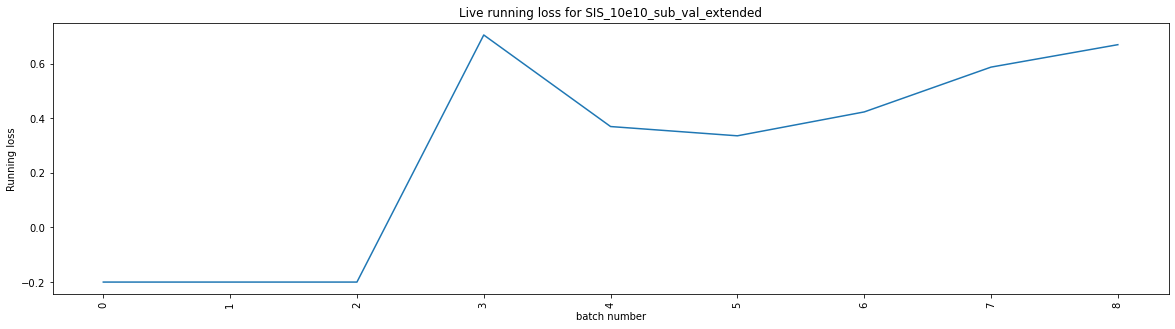

hard coded shown metrics at _plot_concatedated_data in substructure_classifier_development.py


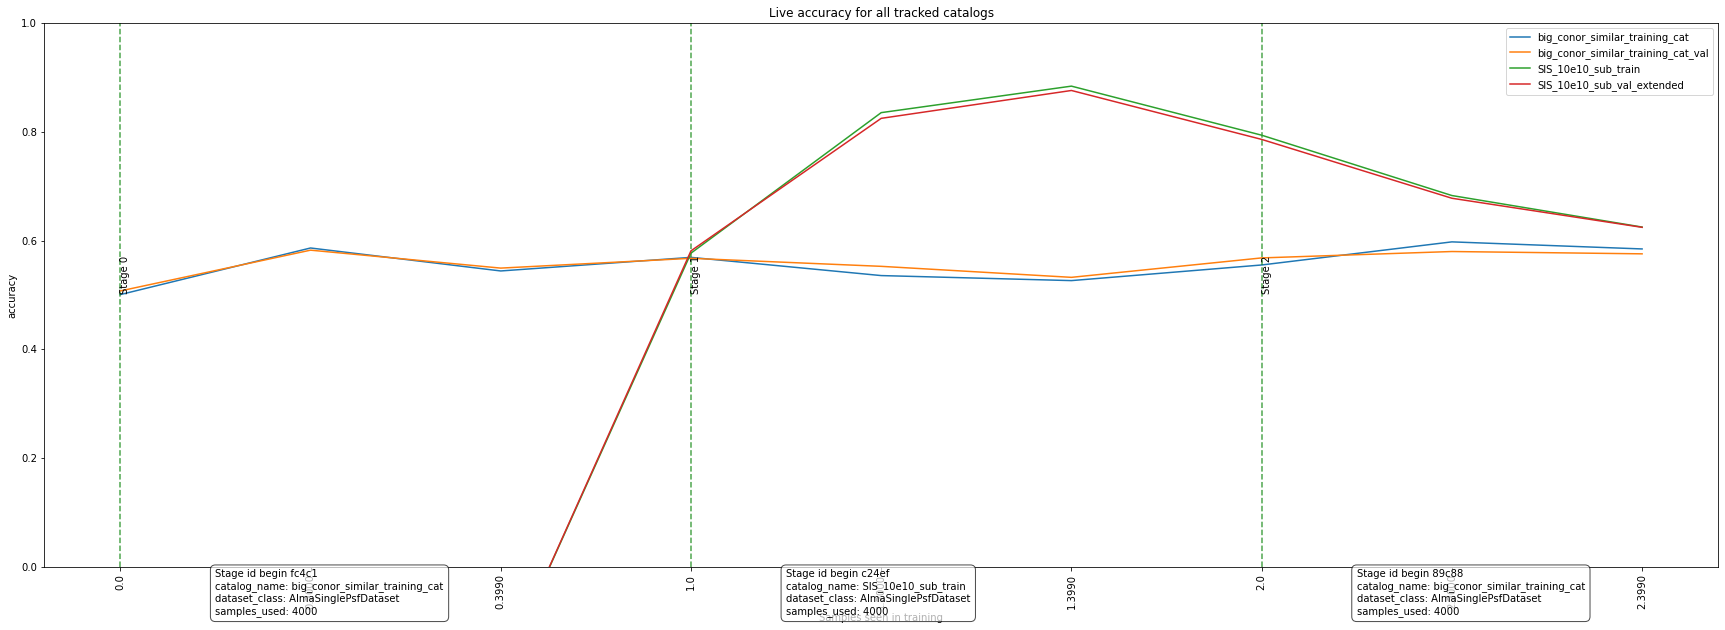

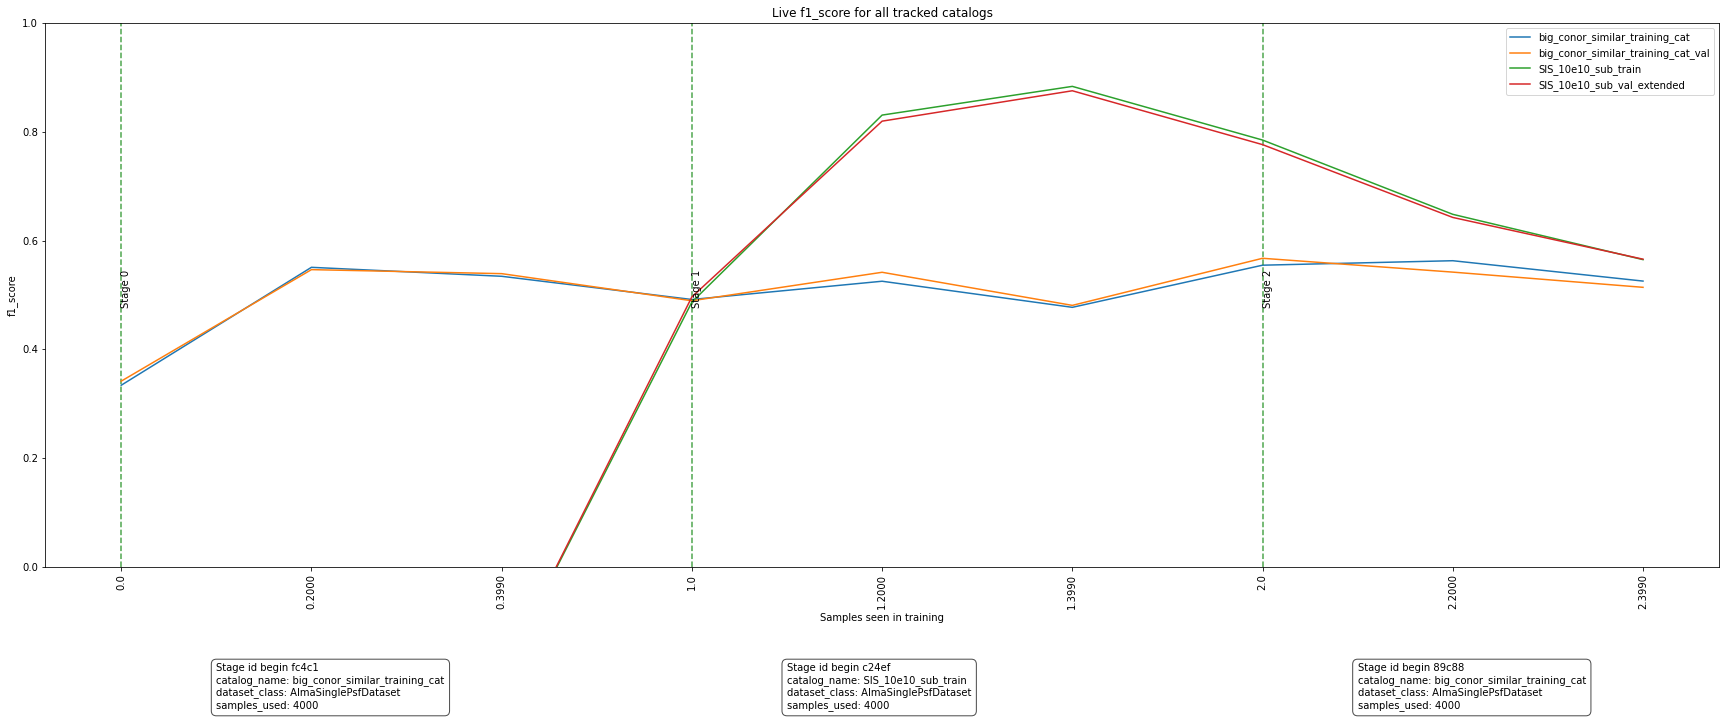

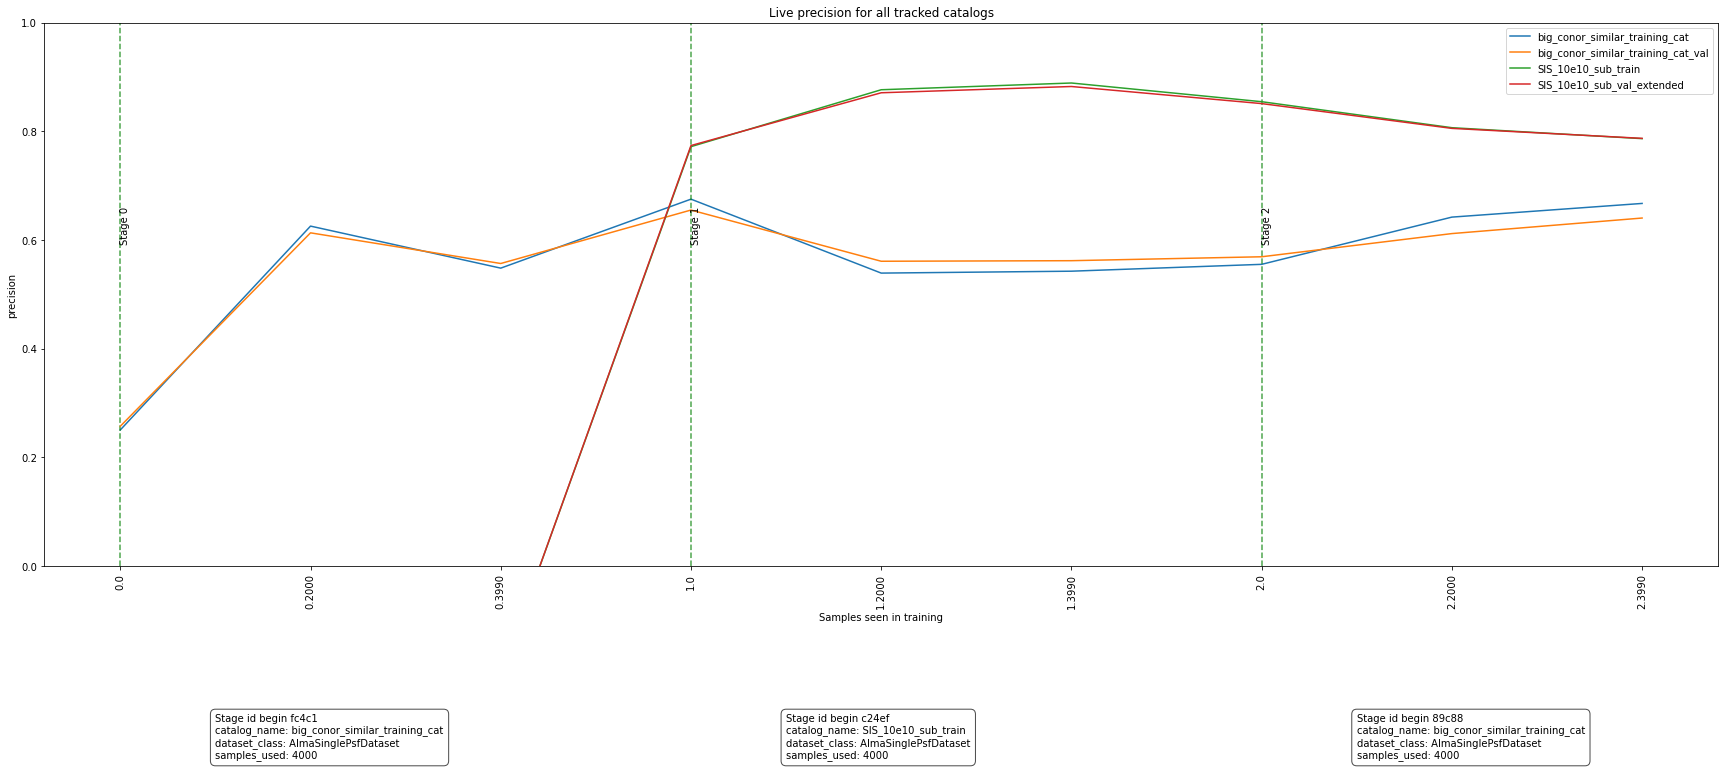

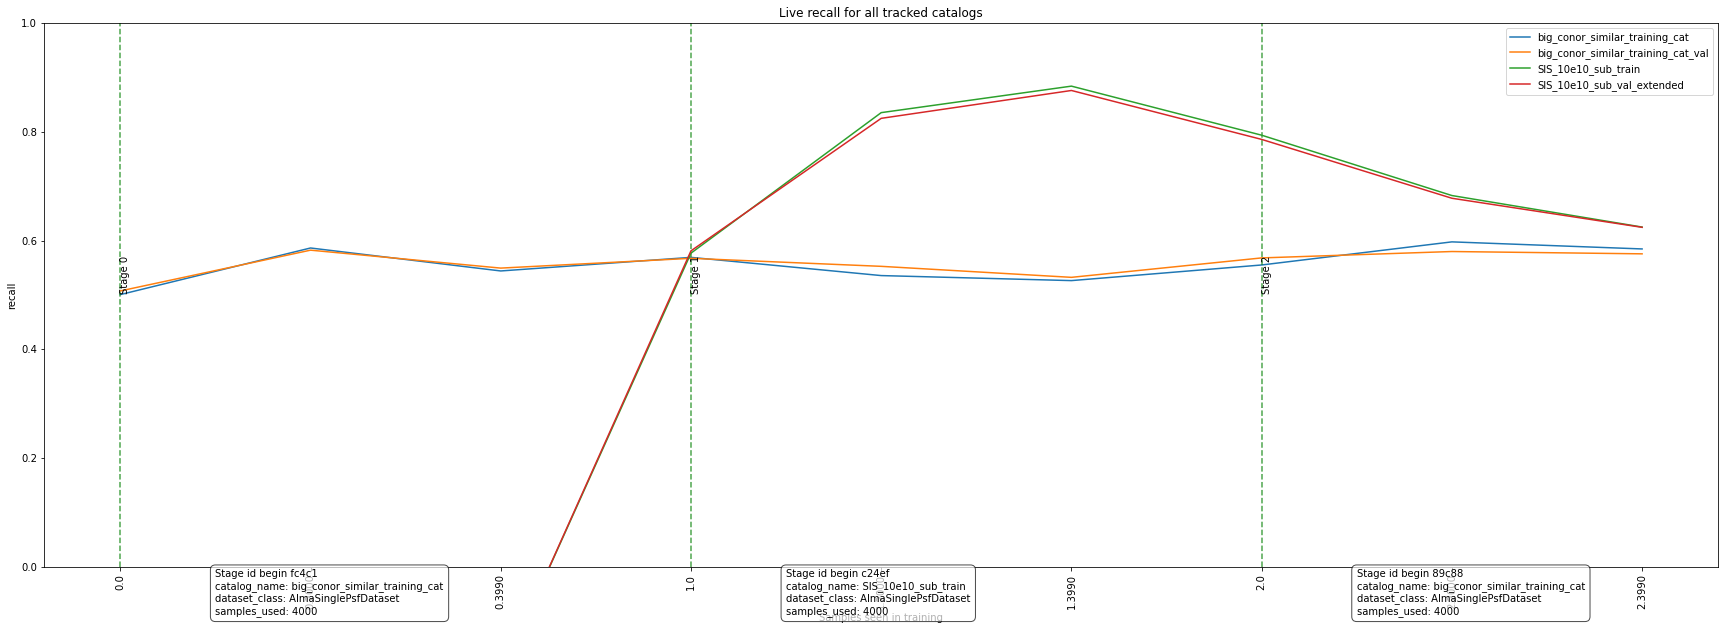

In [3]:
from substructure_classifier.substructure_classifier_development import SubstructureClassifier

my_classifier=SubstructureClassifier(classifier_name="second_transformer")
my_classifier._plot_concatenated_data()

Right now considering only selection by catalog and not by dataset in plotting in substructure_classifier_development.py
running loss plot for the training catalogs
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b


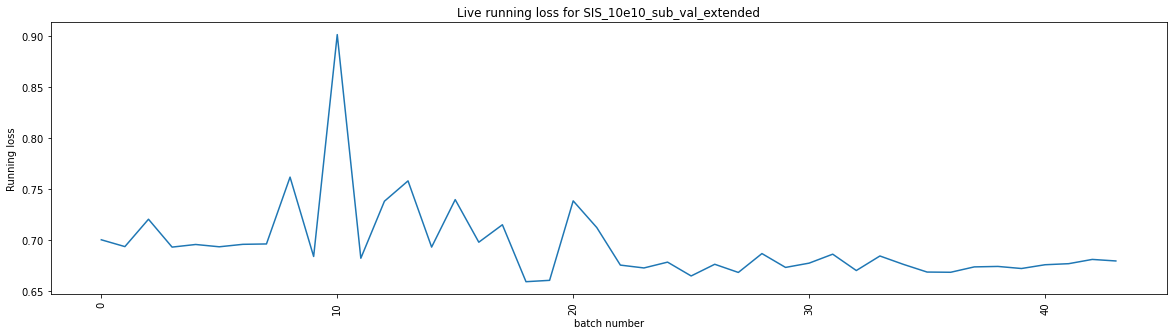

Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b


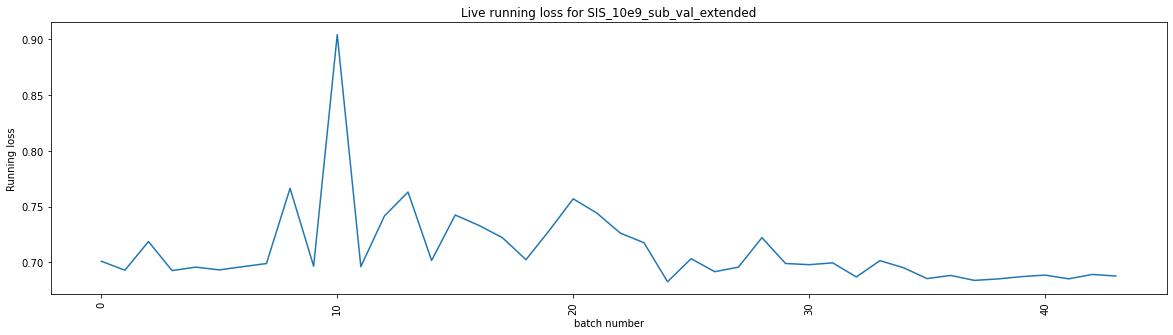

Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b


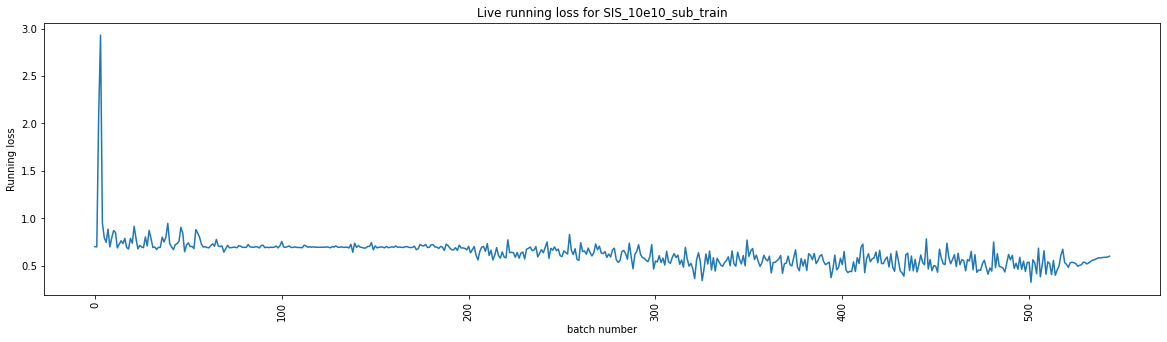

Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b


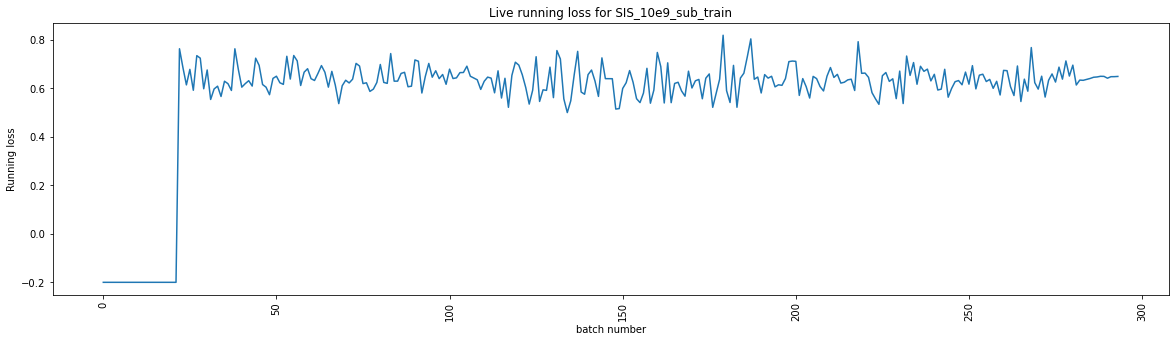

Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b


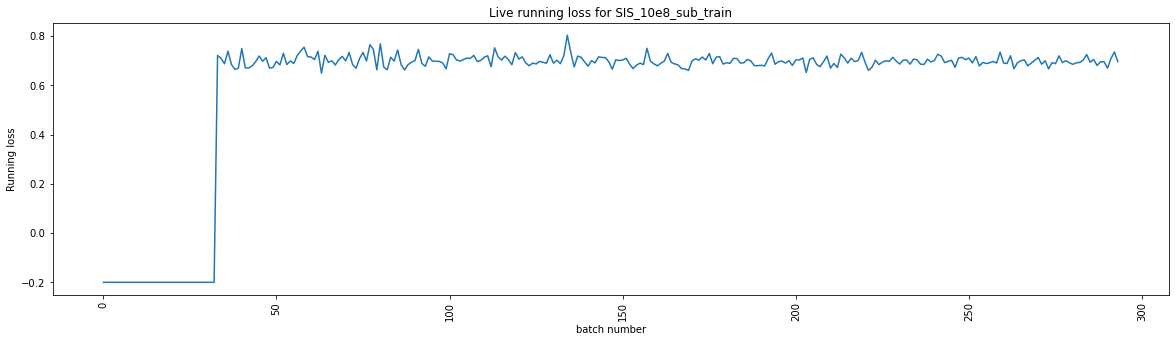

Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b


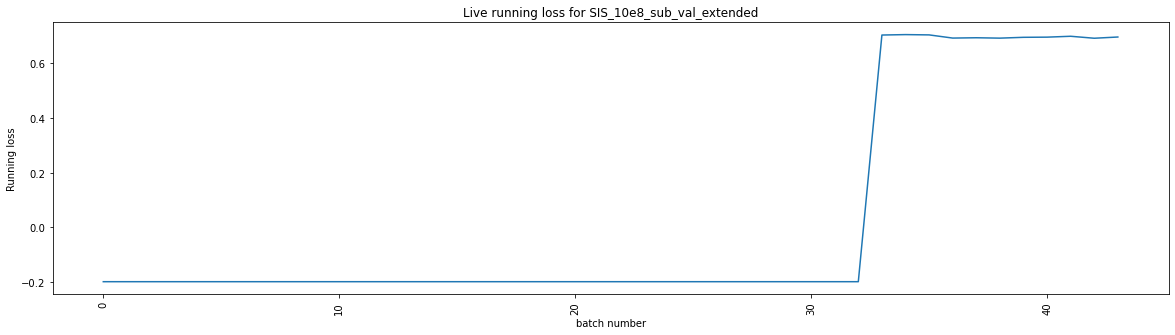

Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b


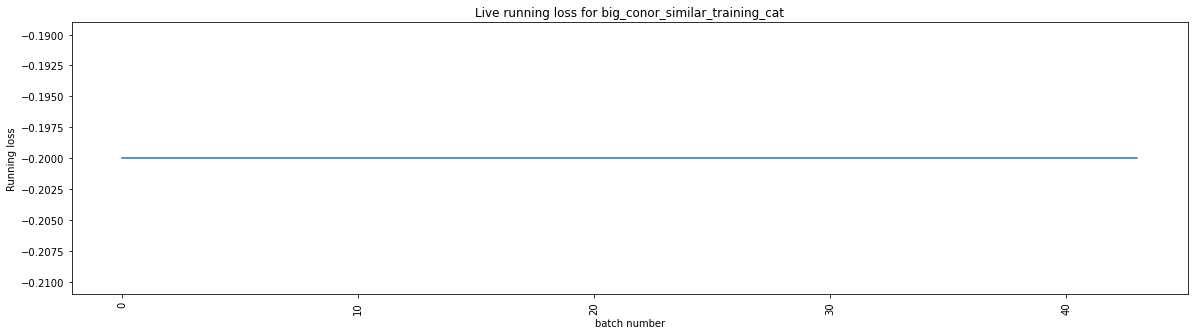

Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b


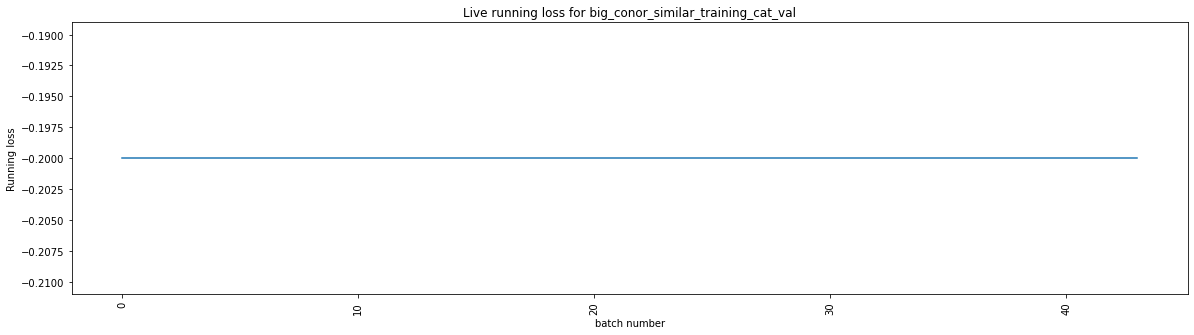

hard coded shown metrics at _plot_concatedated_data in substructure_classifier_development.py
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metr

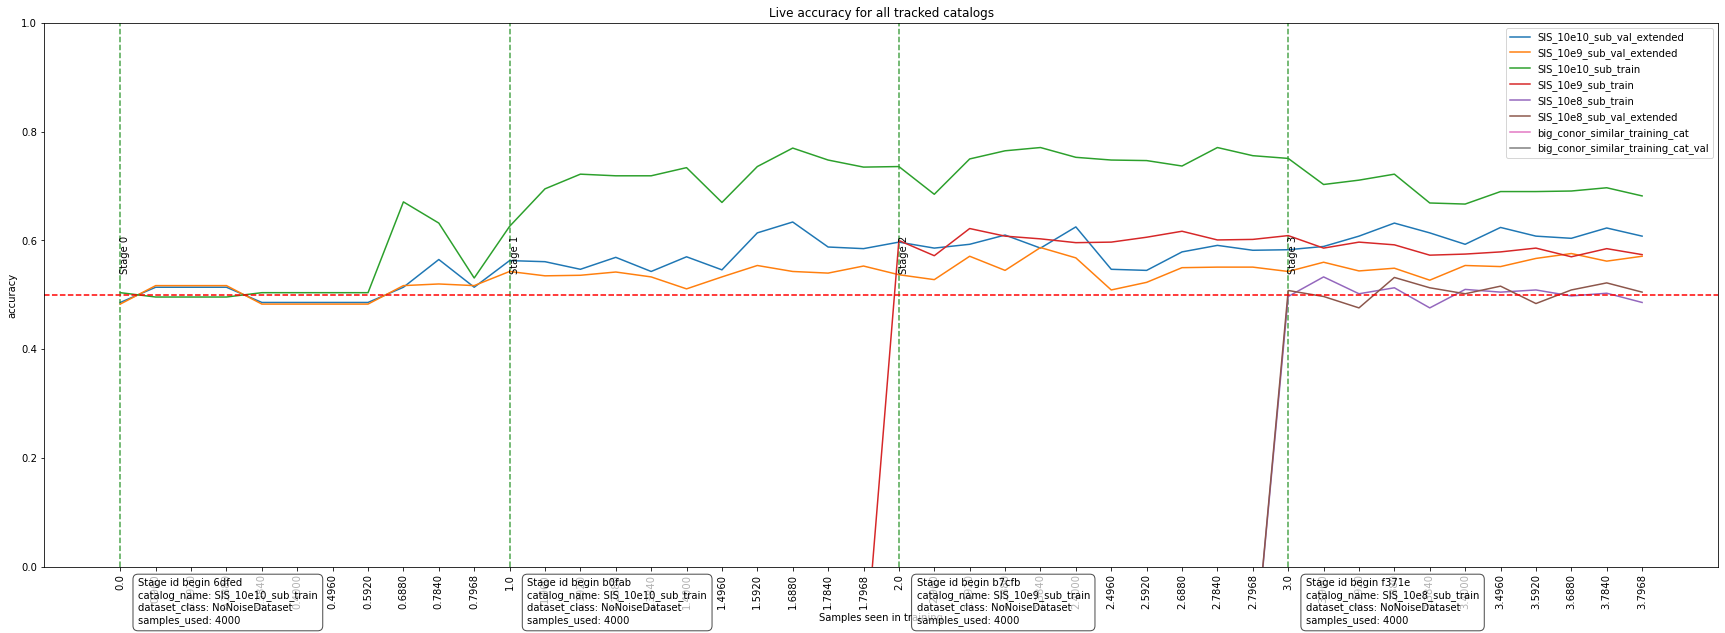

Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live 

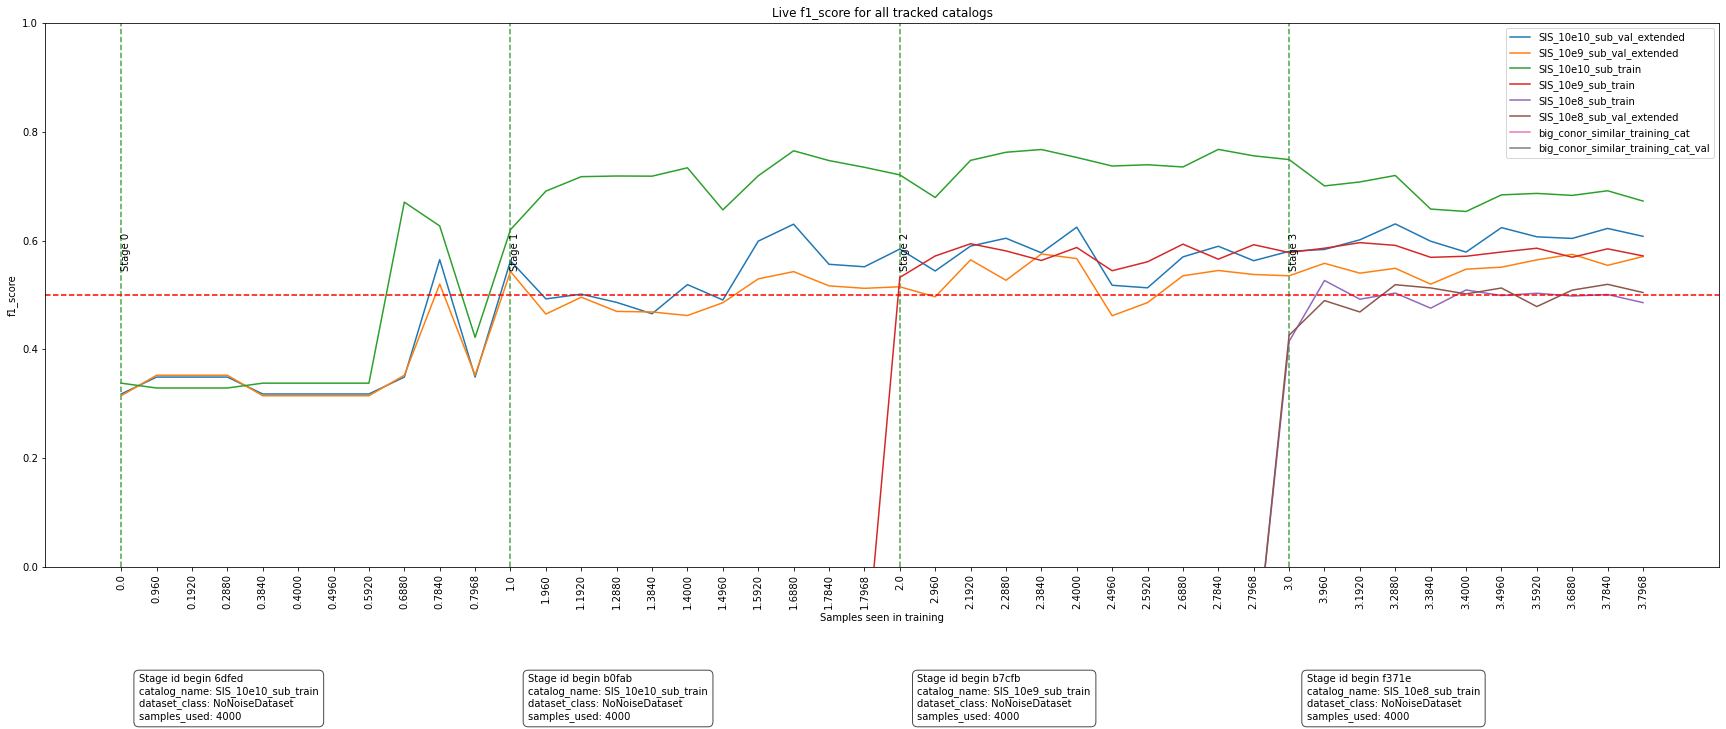

Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live 

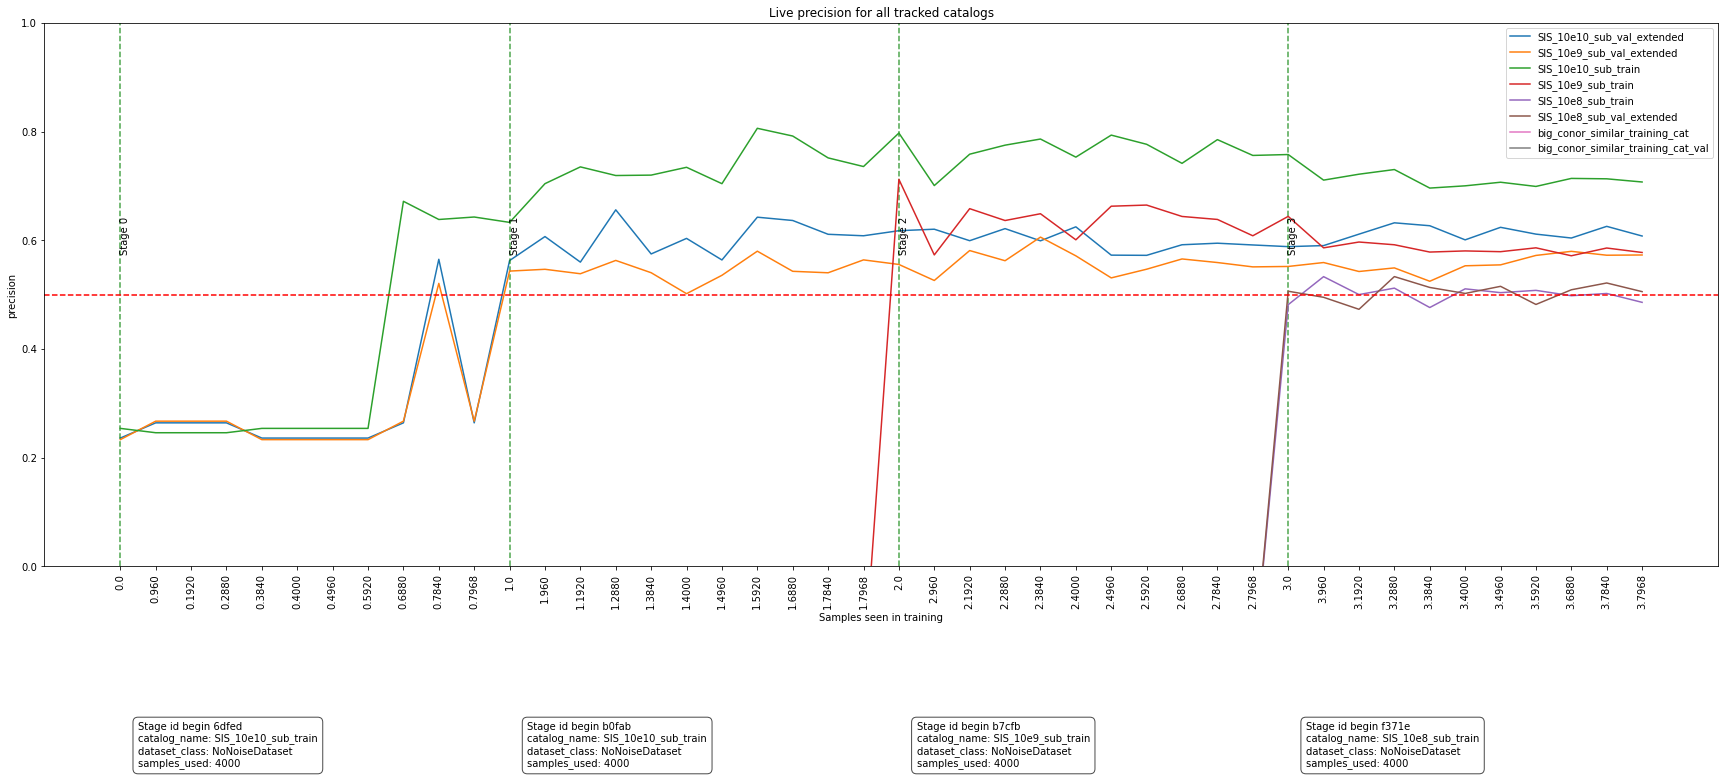

Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Offline metrics not found for stage 015d548621f2a3bfedd9bce8cb7b0de416d0a93401871644fe55f7e33b45e52b
Live 

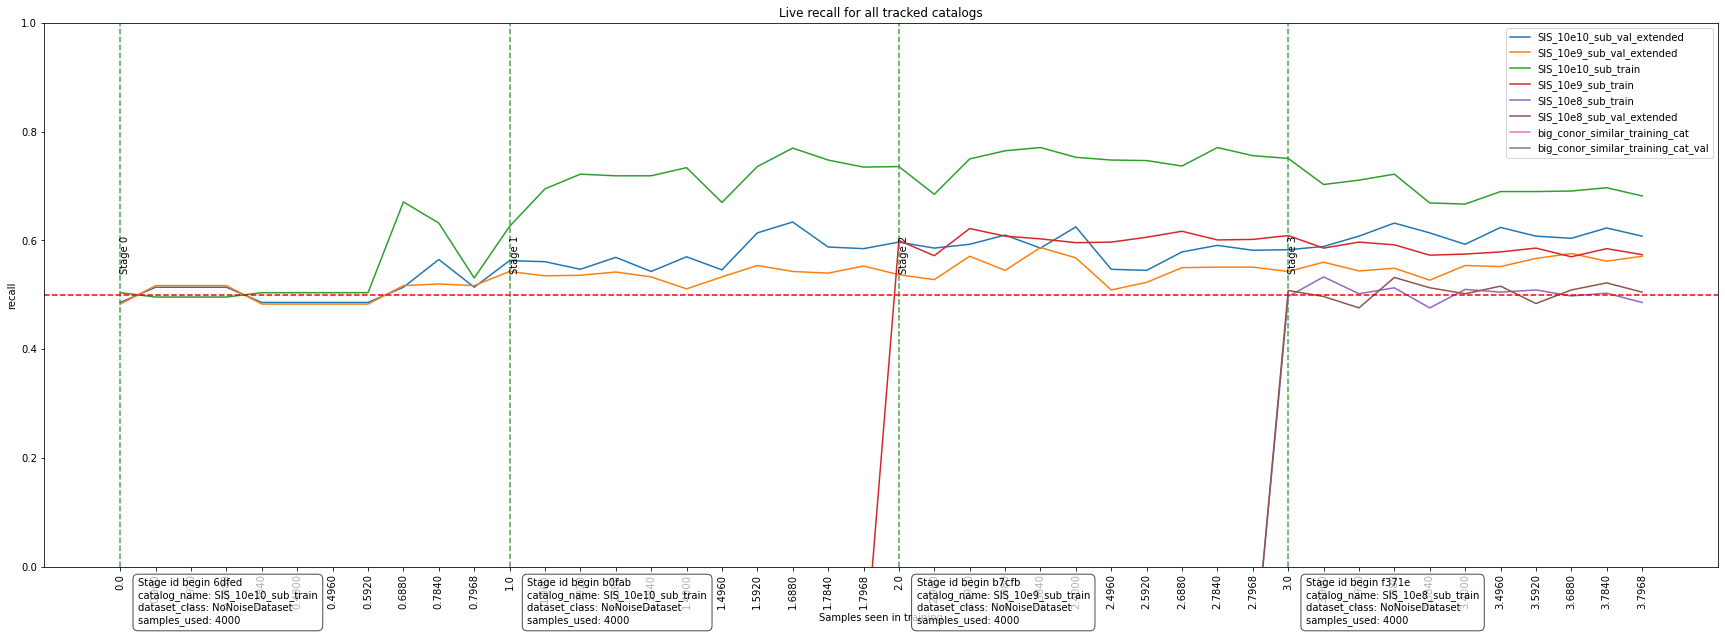

In [2]:
from substructure_classifier.substructure_classifier_development import SubstructureClassifier

my_classifier=SubstructureClassifier(classifier_name="simple_vit5")
my_classifier._plot_concatenated_data()